In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

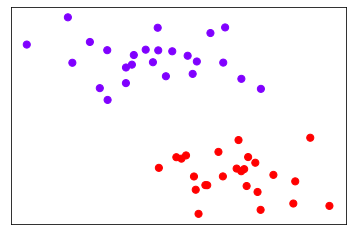

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

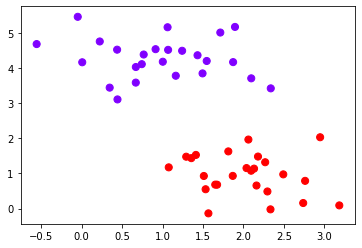

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)

In [4]:
axisy, axisx = np.meshgrid(axisy,axisx)

In [6]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
xy.shape

(900, 2)

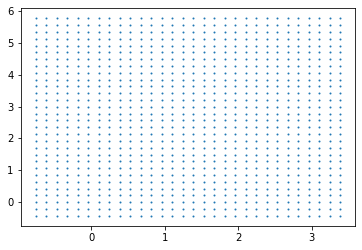

In [7]:
plt.scatter(xy[:, 0], xy[:, 1], s=1, cmap="rainbow")

In [8]:
clf = SVC(kernel="linear").fit(X, y)
Z = clf.decision_function(xy).reshape(axisx.shape)

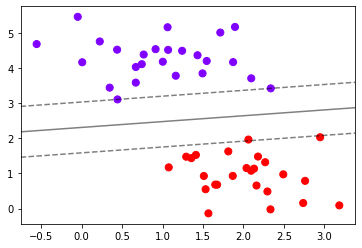

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s = 50, cmap="rainbow")
ax = plt.gca()
ax.contour(axisx, axisy, Z
           , colors = "k"
           , levels =[-1, 0, 1]
           , alpha= 0.5
           , linestyles=["--", "-", "--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [10]:
xlim

(-0.7541740493109252, 3.3838081780236036)

### kernel funcation 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_moons, make_blobs, make_classification
from matplotlib.colors import ListedColormap

In [15]:
# 创建数据集
n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples, n_features=2, n_informative=2
                        , n_redundant=0, random_state=5)
]

Kernel = ["linear"]

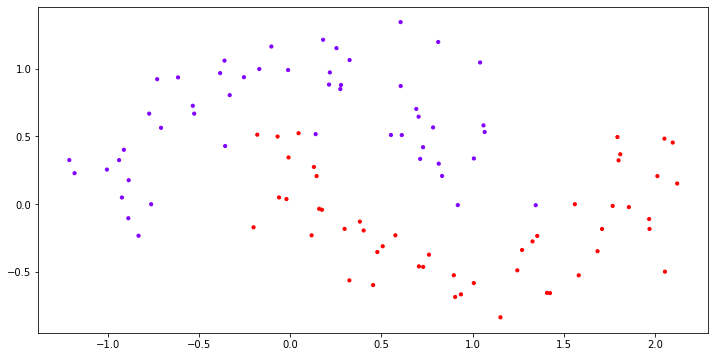

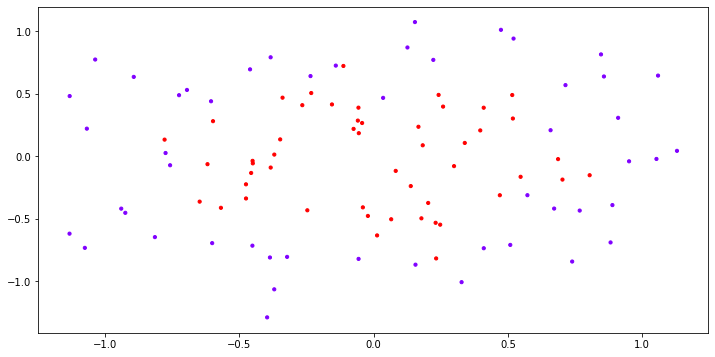

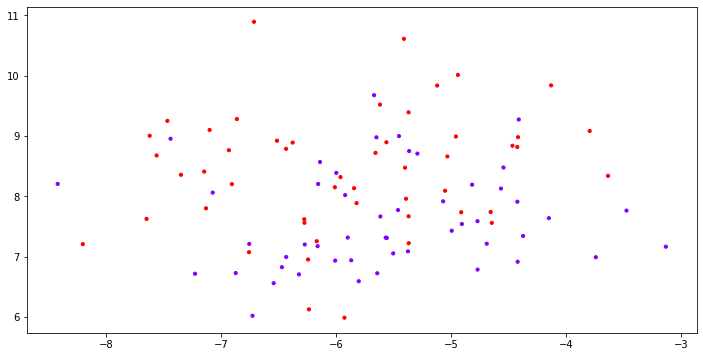

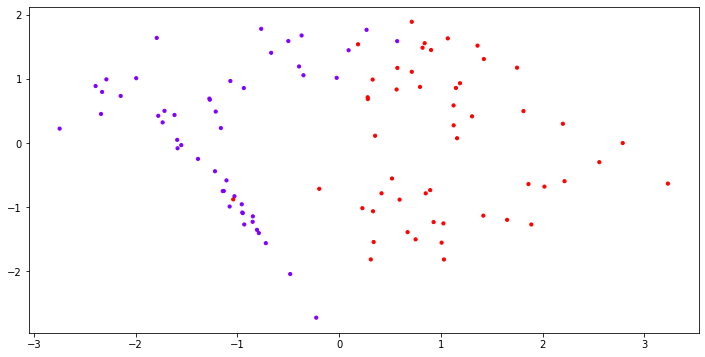

In [16]:
for X, Y in datasets:
    plt.figure(figsize=(12, 6))
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=10, cmap="rainbow")

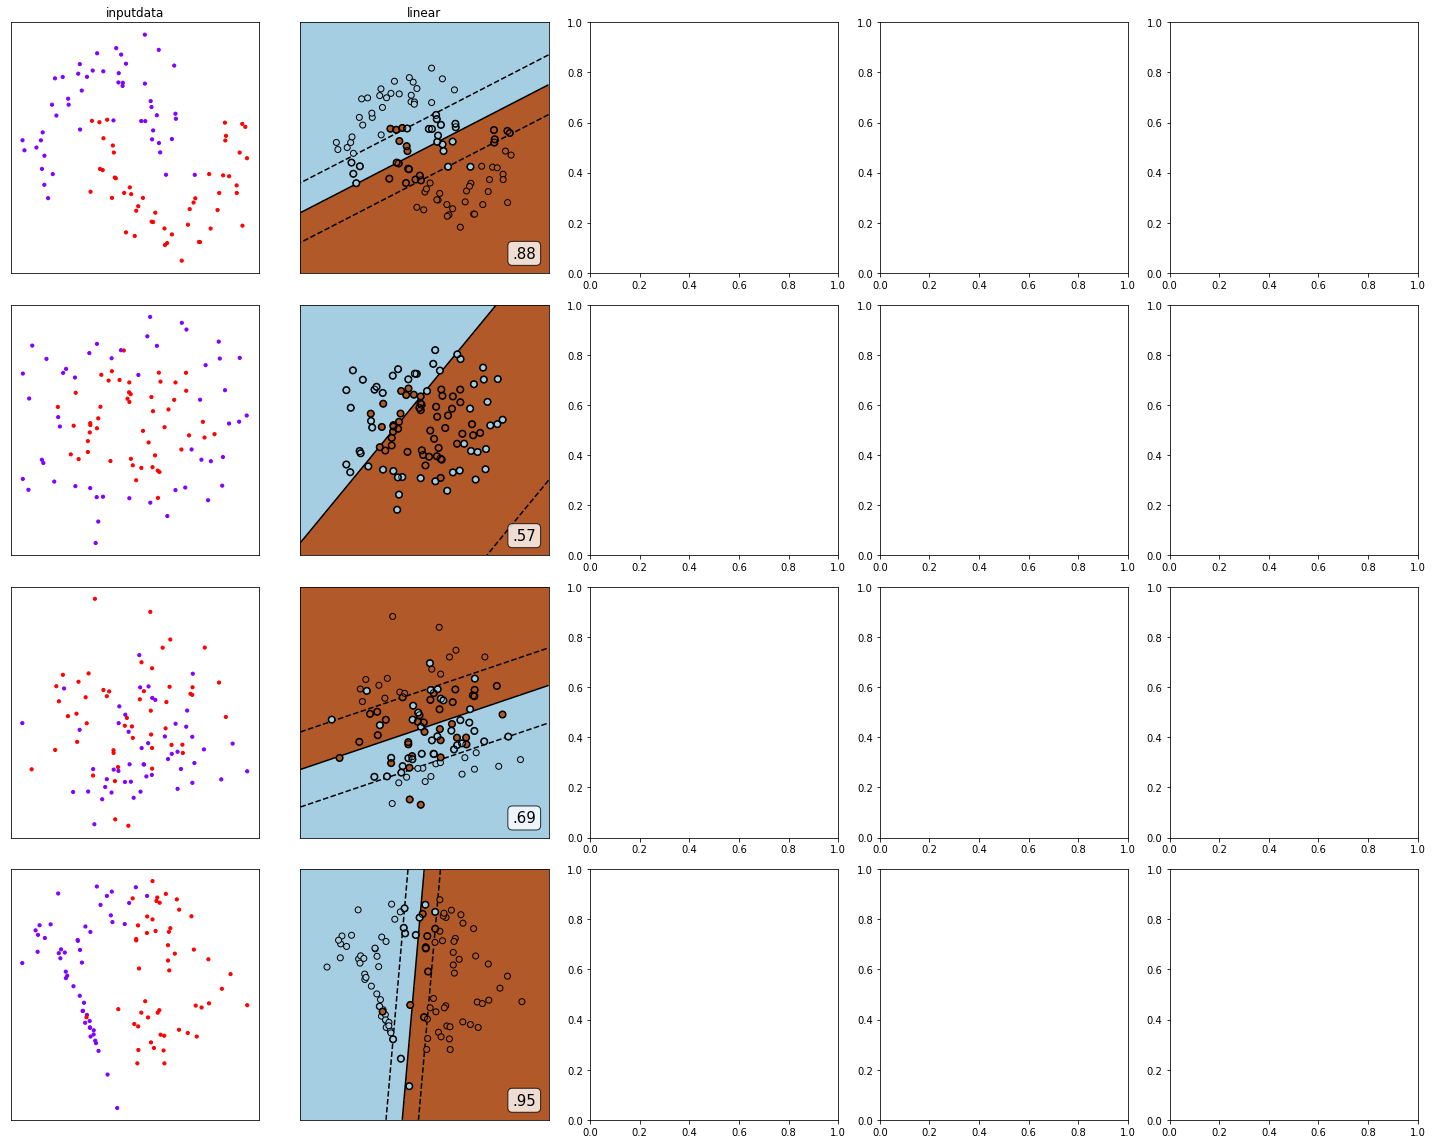

In [17]:
Kernal = ["linear"]
nrows = len(datasets)
ncols = len(datasets)+1

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

for ds_snn, (X, Y) in enumerate(datasets):
    ax = axes[ds_snn, 0]
    if ds_snn == 0:
        ax.set_title("inputdata")
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=10, cmap="rainbow")
    ax.set_xticks([])
    ax.set_yticks([])
    
    for est_idx, kernel in enumerate(Kernel):
        ax = axes[ds_snn, est_idx+1]
        clf = SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        
        ax.scatter(X[:, 0], X[:, 1], c=Y, zorder = 10, cmap=plt.cm.Paired, edgecolors="k")
        # 绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50, facecolor="none", zorder=10, edgecolor="k")
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        axisx = np.linspace(xlim[0]-0.5, xlim[1]+0.5, 200)
        axisy = np.linspace(ylim[0]-0.5, ylim[1]+0.5, 200)
        axisx, axisy = np.meshgrid(axisx, axisy)
        Z = np.vstack([axisx.ravel(), axisy.ravel()]).T
        P = clf.decision_function(Z).reshape(axisx.shape)
        
        ax.pcolormesh(axisx, axisy, P>0, cmap=plt.cm.Paired)
        ax.contour(axisx, axisy, P, colors = "k", linestyles = ["--", "-", "--"], levels=[-1, 0, 1])
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        if ds_snn == 0:
            ax.set_title(kernel)
            
        ax.text(0.95, 0.06, ("%0.2f"%score).lstrip("0")
                , size=15, bbox = dict(boxstyle="round"
                               , alpha=0.8
                               , facecolor="white")
                , transform=ax.transAxes
                , horizontalalignment="right")
plt.tight_layout()
plt.show()